# Machine Learning in Focus: Analyzing DSSE's Data Science Trends

In this project, our goal is to determine the best content to write about in data science, using the Data Science Stack Exchange (DSSE) website as our primary resource. With its focus on data science and a significant number of unanswered questions, DSSE provides an ideal platform for our investigation.

To achieve our goal, we analyzed the DSSE data and discovered that the most popular tags, including machine learning, deep learning, natural language processing (NLP), and neural networks, are all closely related to artificial intelligence (AI). These tags often appear together in various applications. Machine learning, a subset of AI, involves training algorithms to learn from data and make predictions or decisions autonomously. Deep learning, a type of machine learning, utilizes multi-layer neural networks to understand complex data representations. Neural networks, inspired by the human brain, are algorithmic structures capable of learning from data and making predictions. NLP, another subfield of AI, focuses on computer-human language interaction, utilizing machine learning and deep learning techniques to analyze, comprehend, and generate human language.

Moreover, our findings highlight a significant increase in the popularity of Machine Learning questions on DSSE, surpassing all other topics in data science. These observations solidify the significance and relevance of Machine Learning in the current data science landscape.

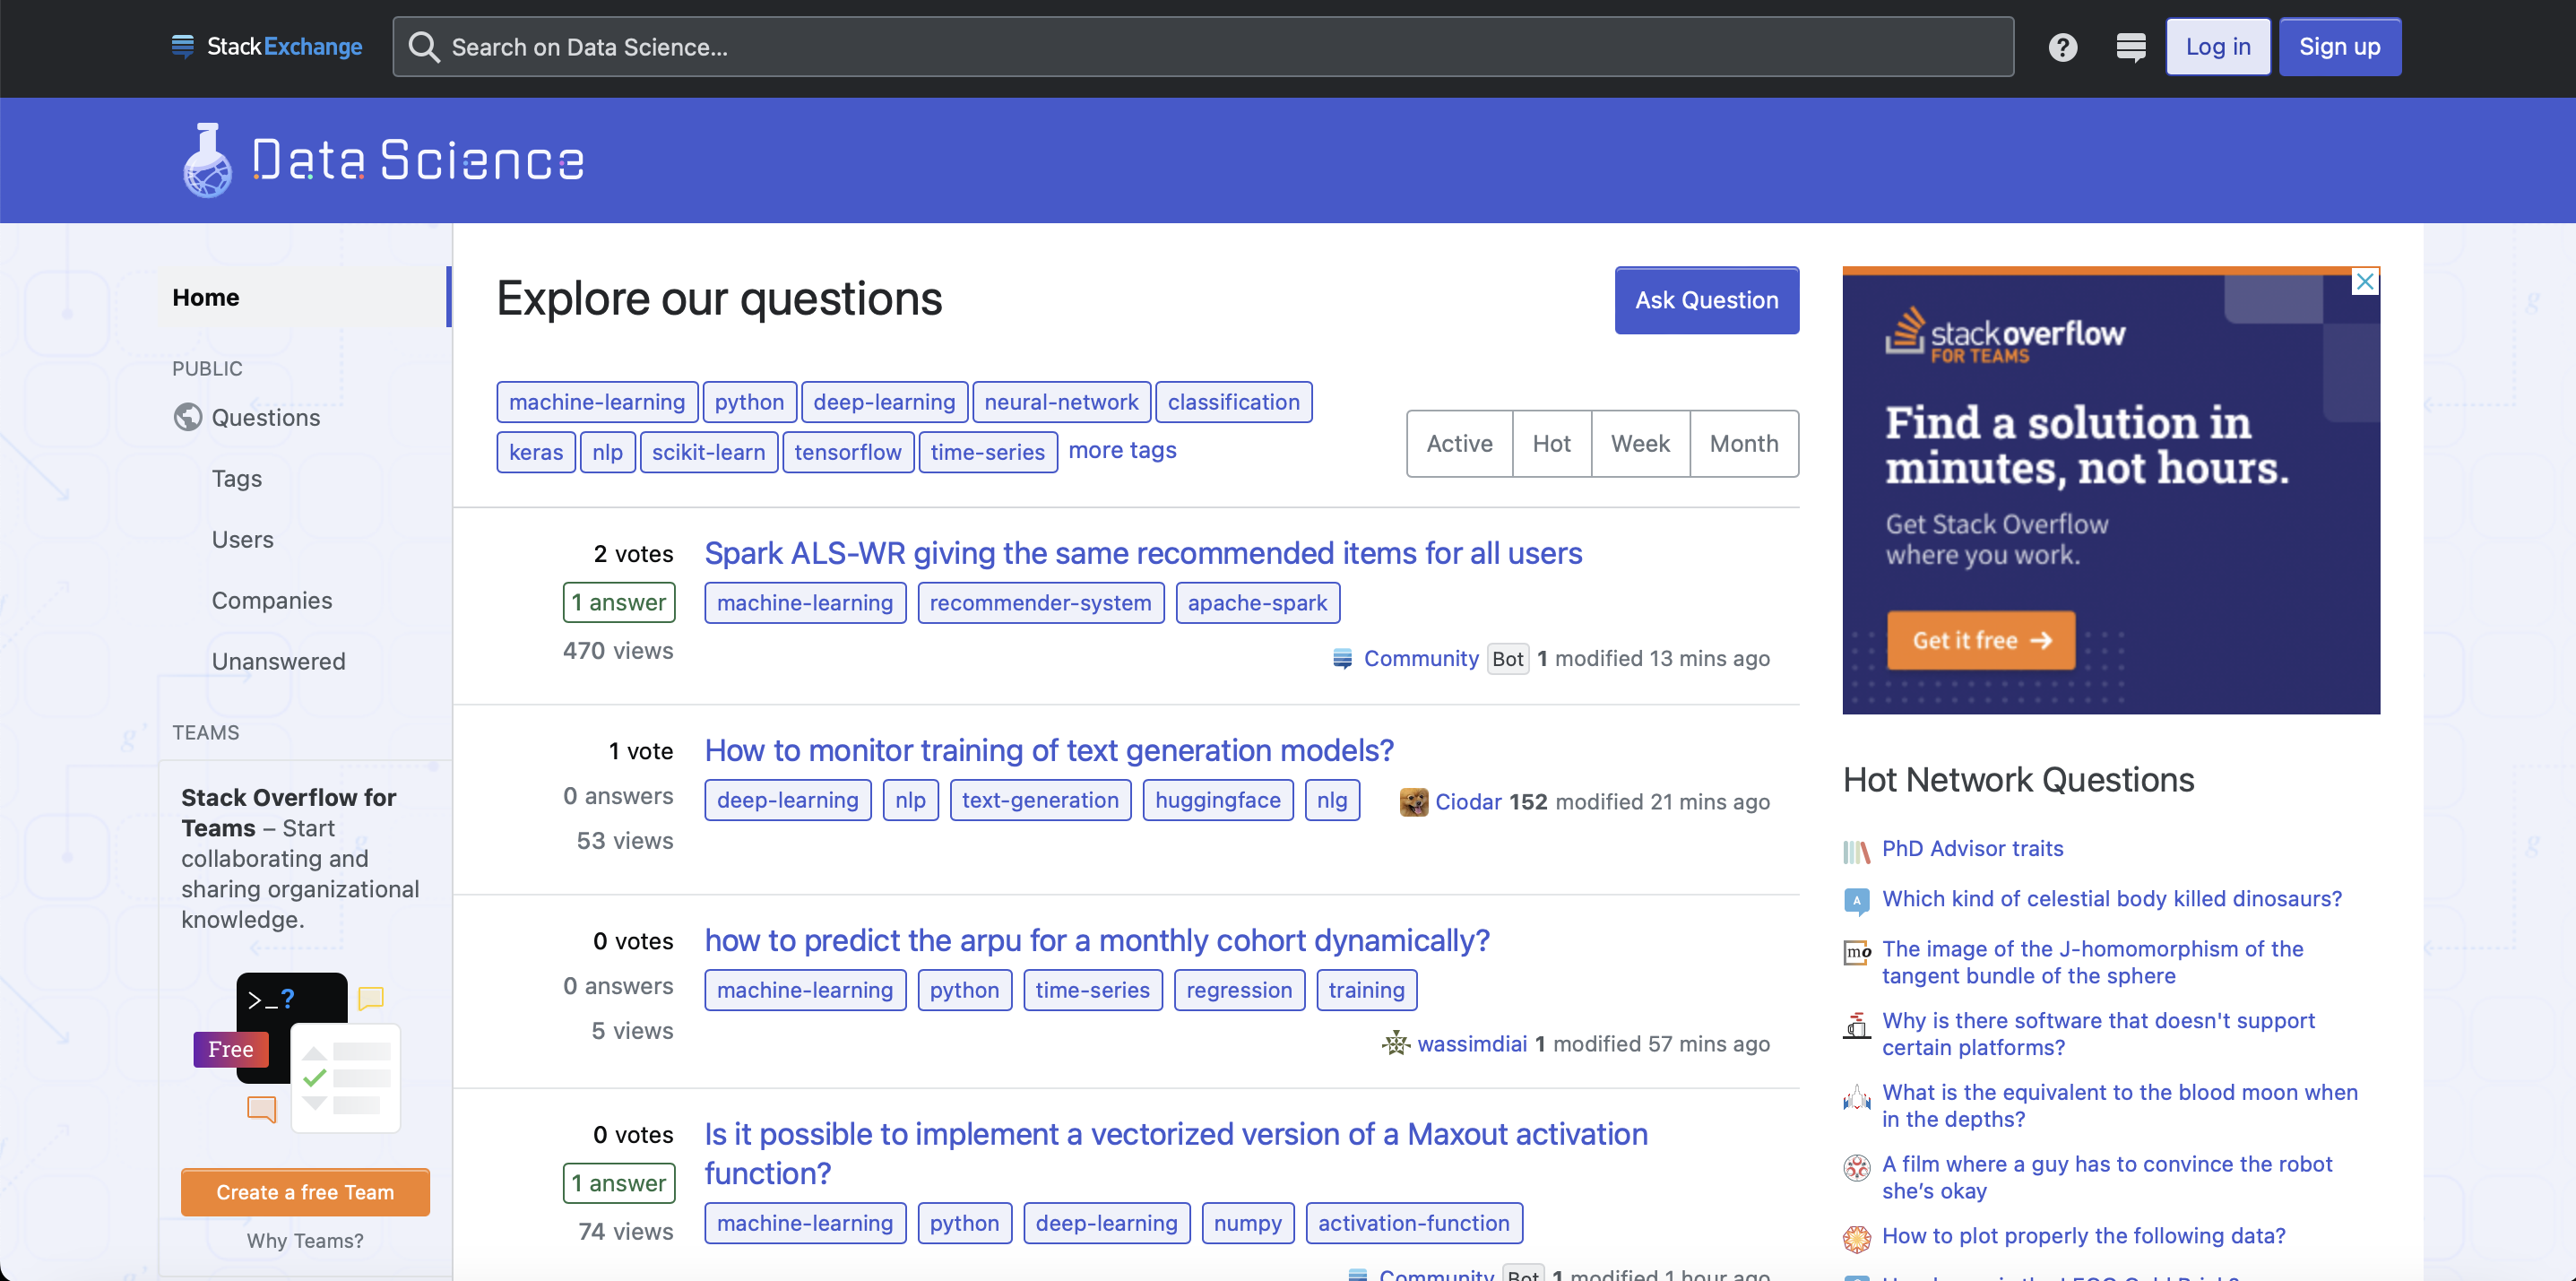

## Querying the database

To access the data en masse we will not scrape the site, but use a public data base for DSSE provided by Stack Exchange:

https://data.stackexchange.com/datascience/query/new

We'll be focusing our attention on the following columns from the posts table that seem relevant towards our goal:
- Id: An identification number for the post.
- PostTypeId: An identification number for the type of post.
- CreationDate: The date and time of creation of the post.
- Score: The post's score.
- ViewCount: How many times the post was viewed.
- Tags: What tags were used.
- AnswerCount: How many answers the question got (only applicable to question posts).
- FavoriteCount: How many times the question was favored (only applicable to question posts).

With the exception of the tags column, the last few columns contain information about how popular the post is — the kind of information we're after.

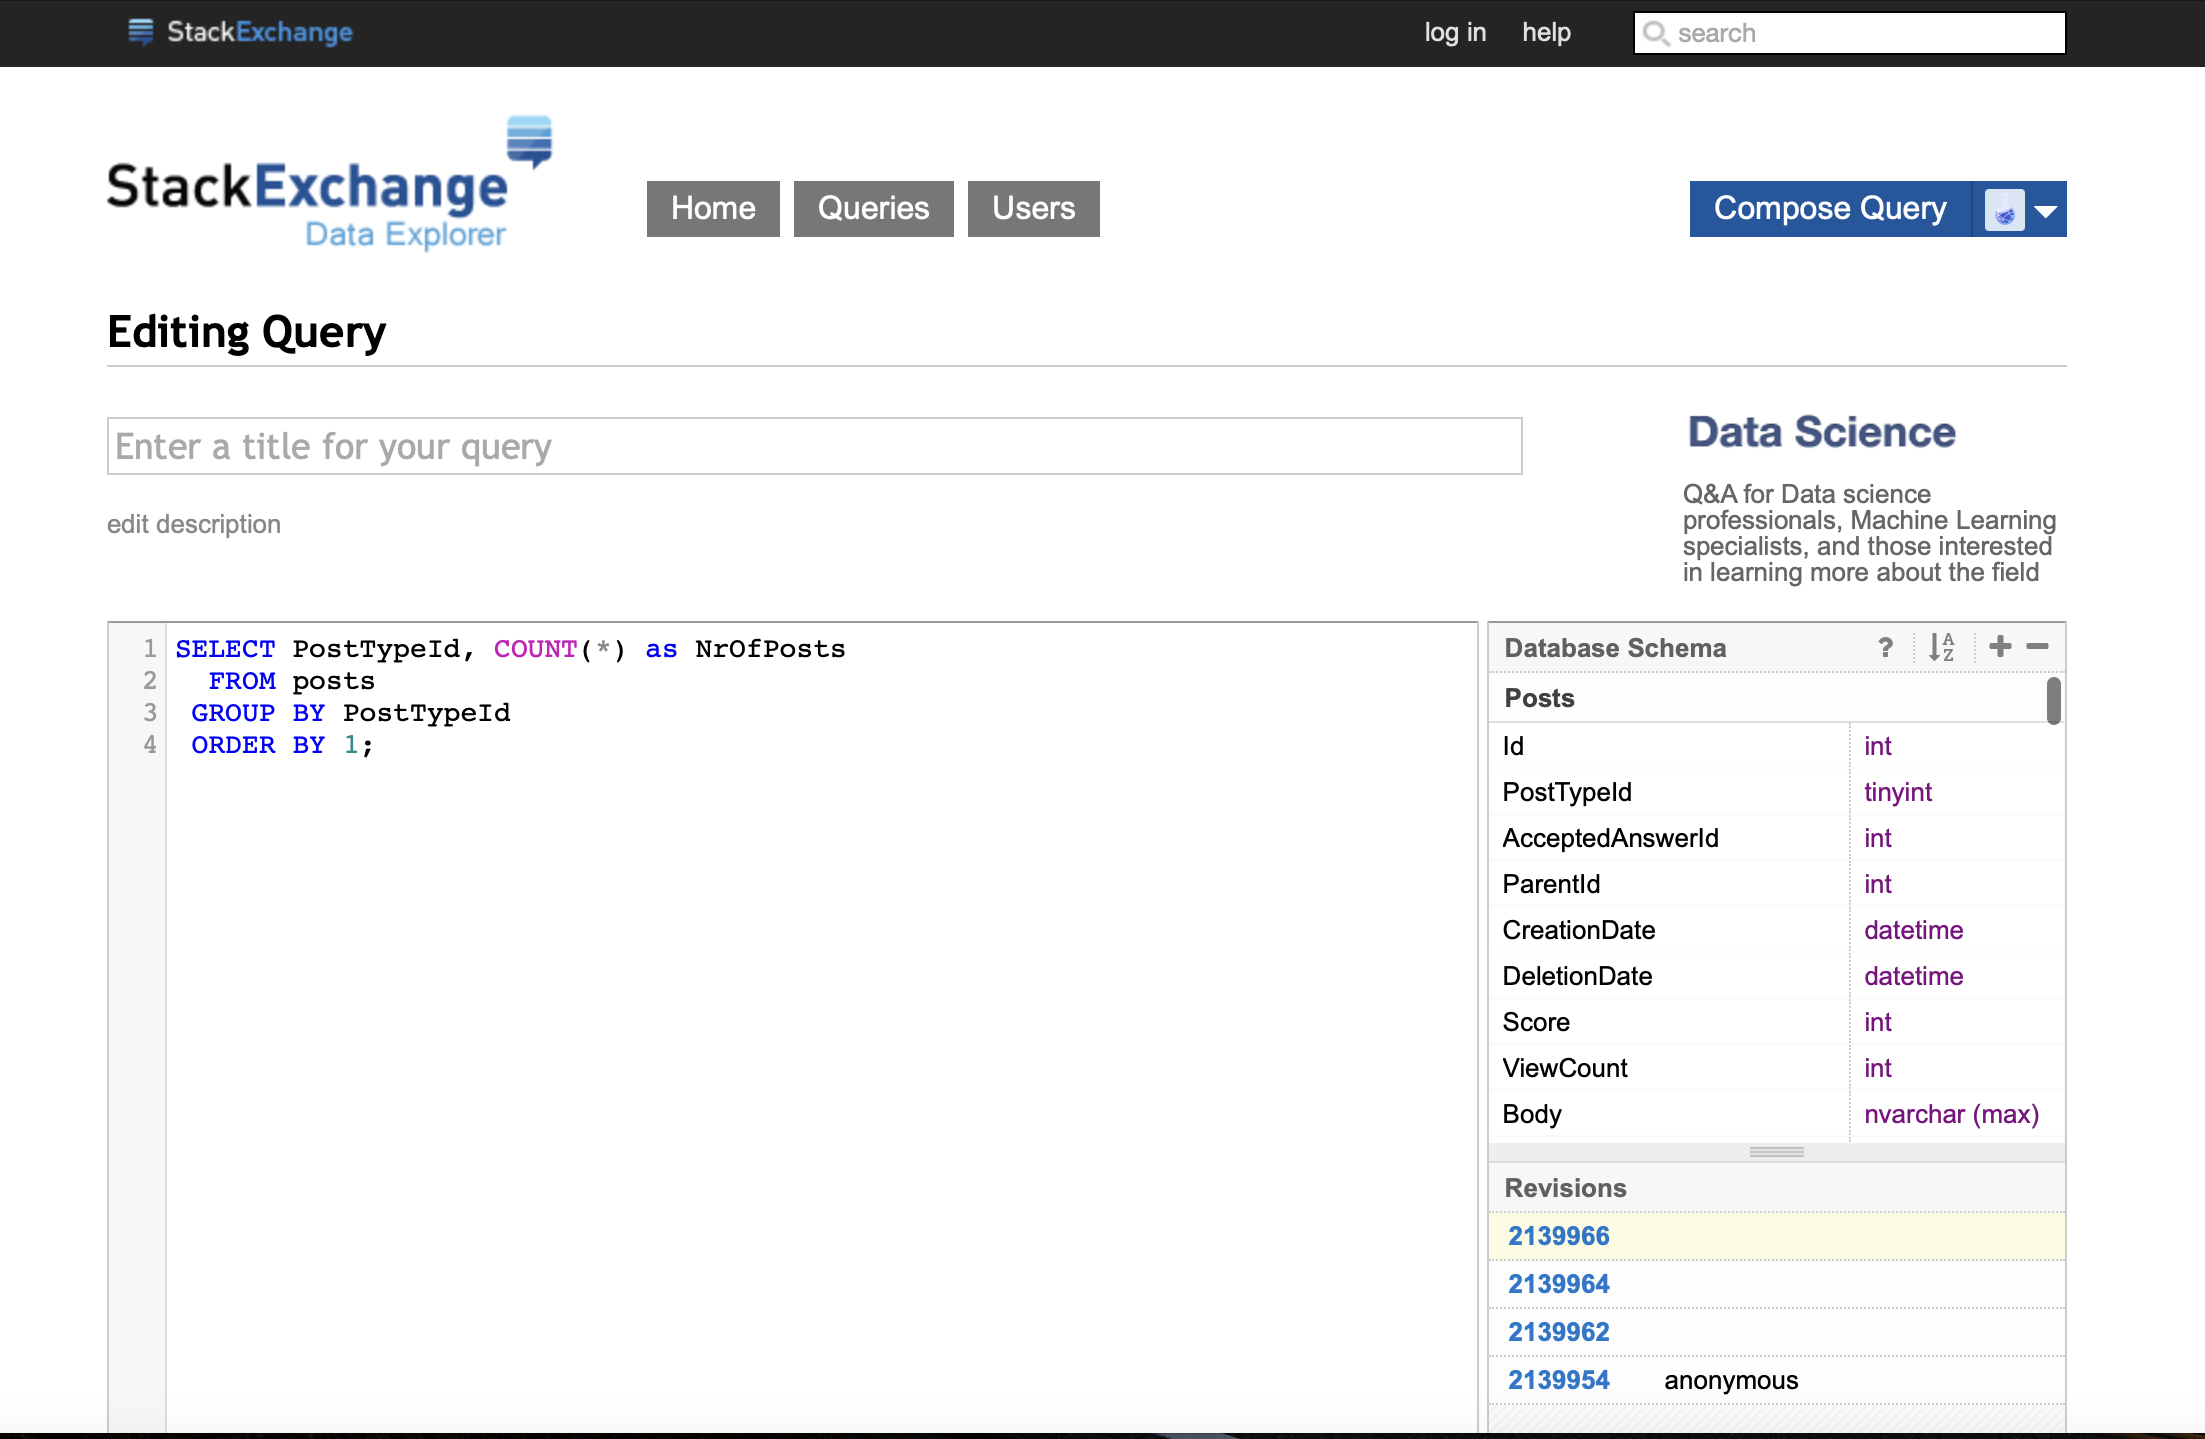

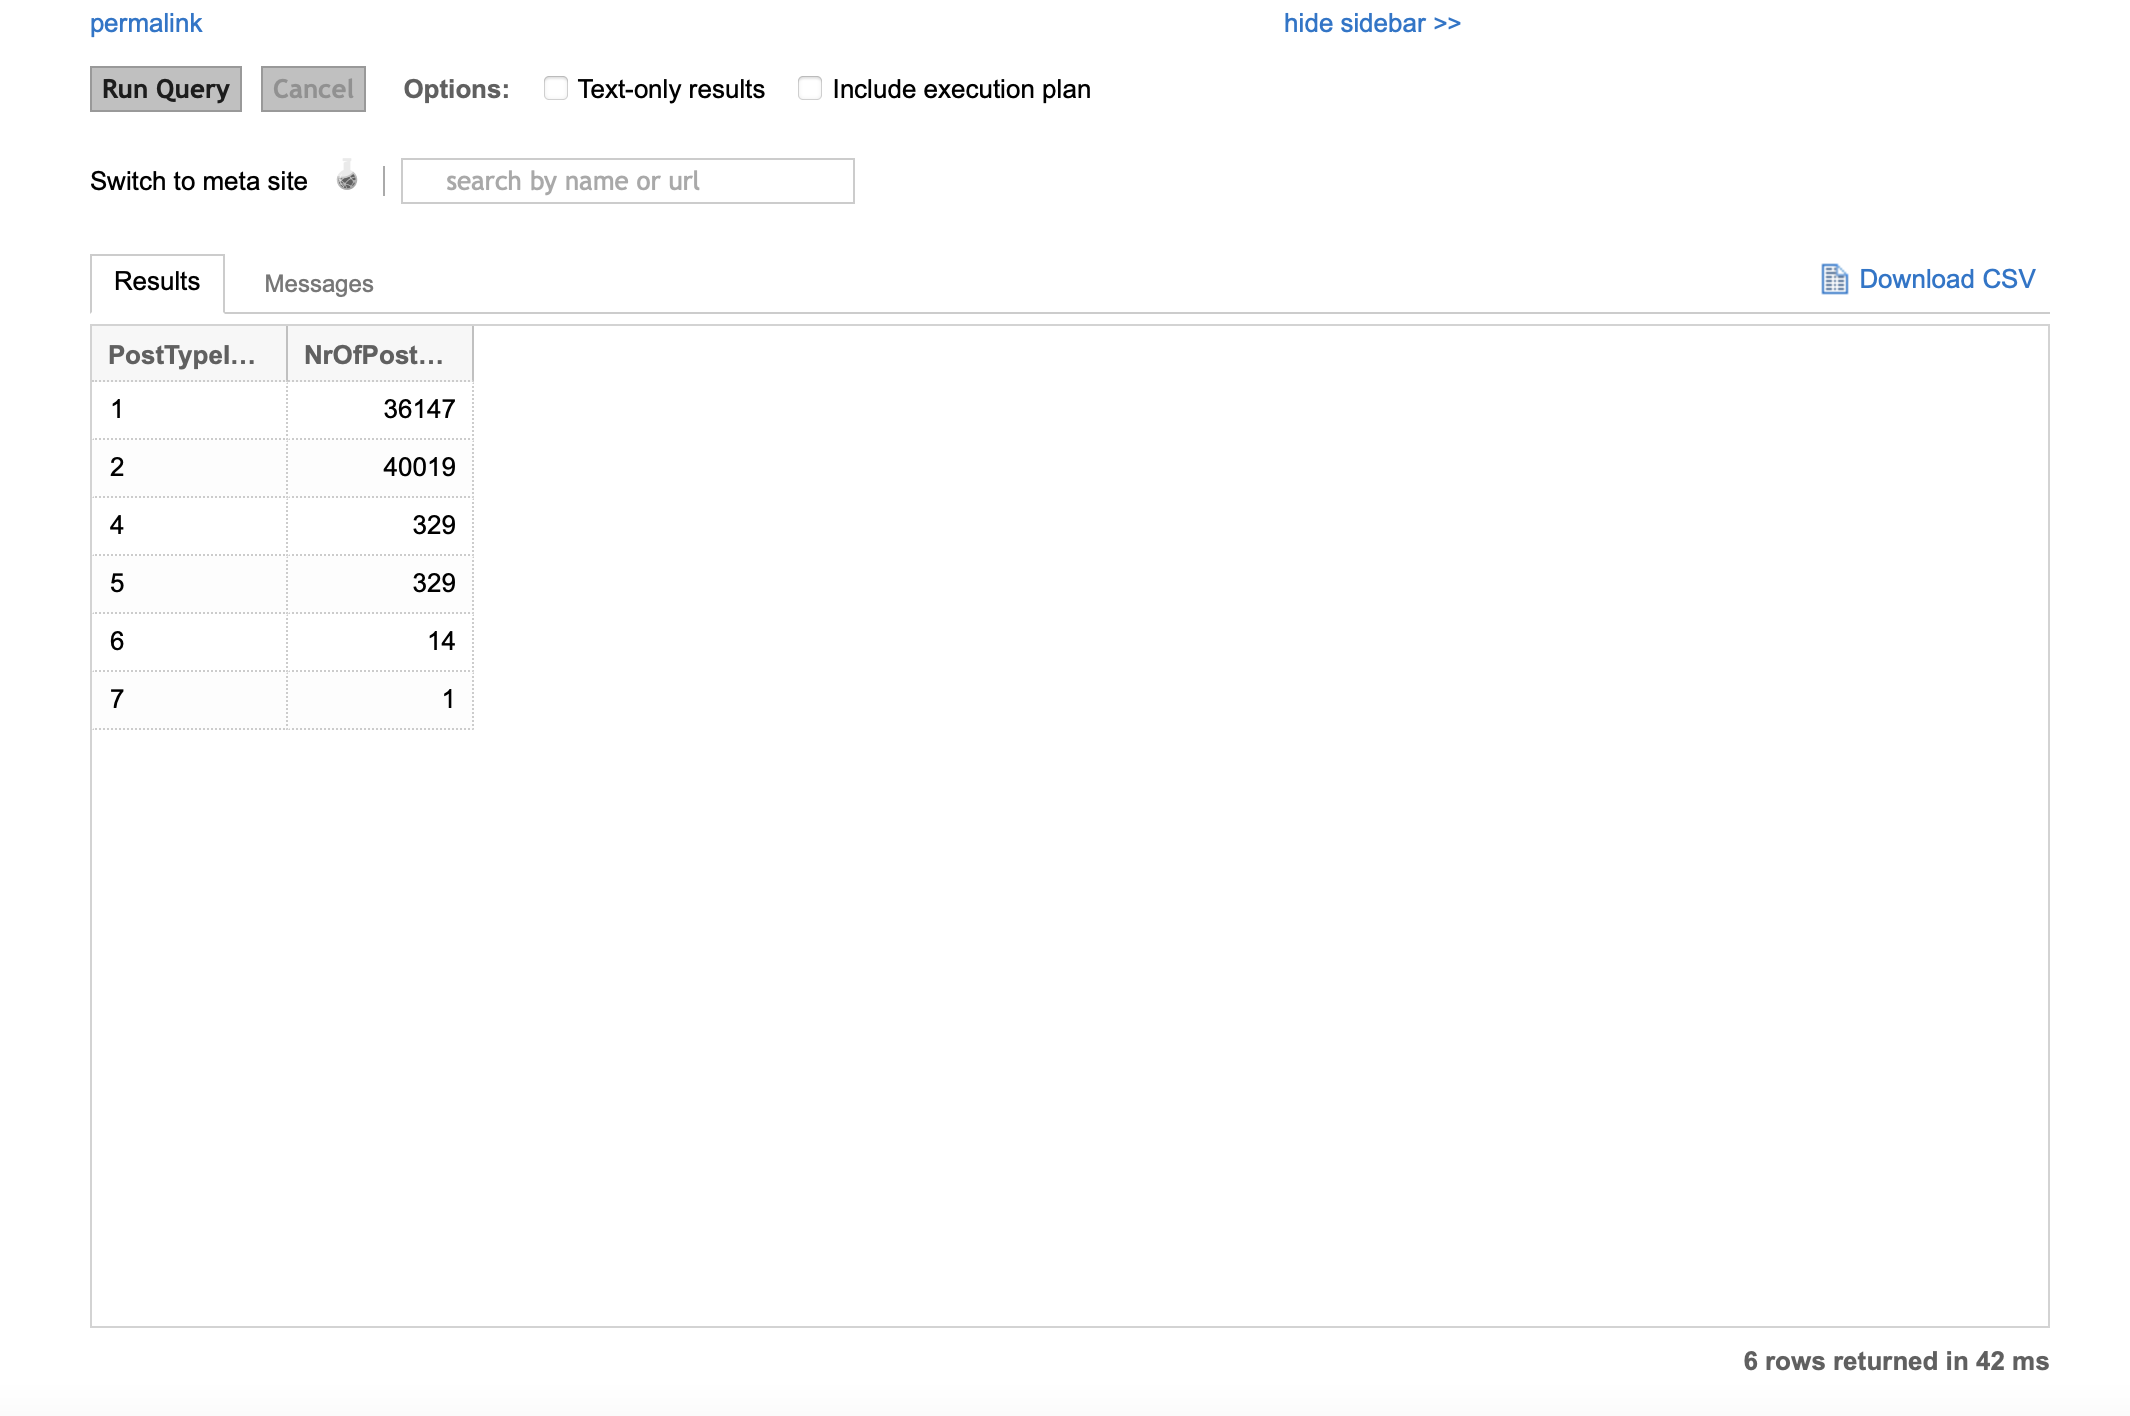

Due to their low volume, anything that isn't a question (1) or an answer (2) is mostly inconsequential. Even if it is the case that such posts are very popular, they are just outliers and not relevant to us.

We'll just focus on the questions posted in 2022-2023.

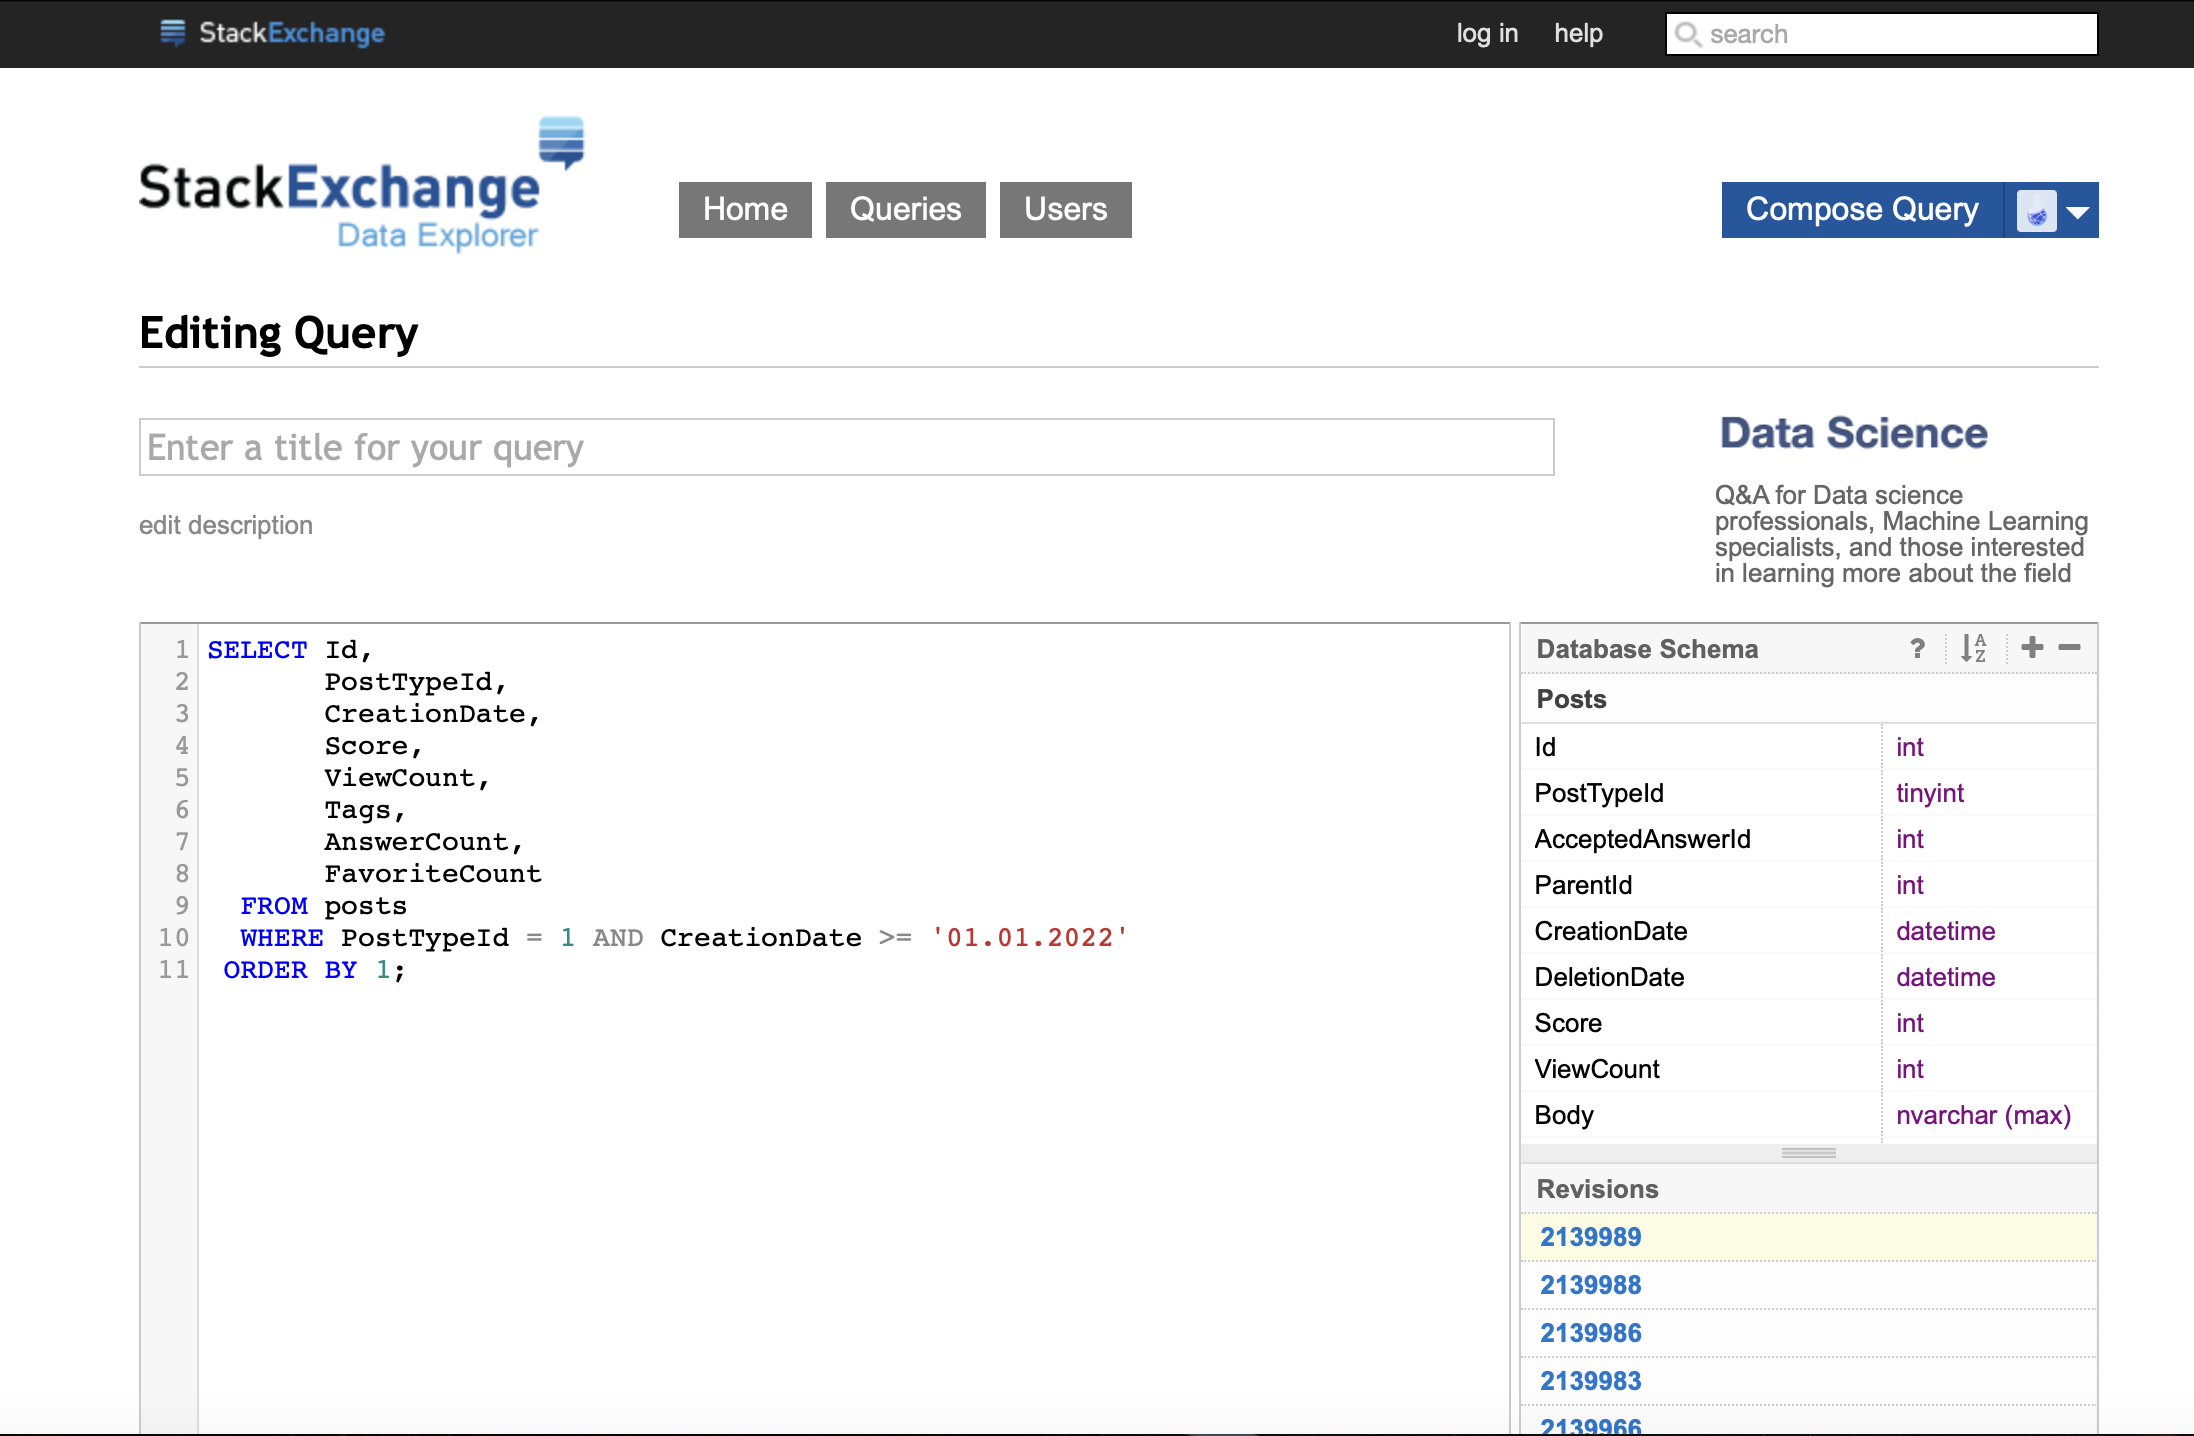

The result of the query was saved in a file named 2023_questions.csv.

## Exploring the Data

Now we can explore the dataset.

In [80]:
import pandas as pd
import datetime as dt

In [81]:
dsse = pd.read_csv('2023_questions.csv')
dsse

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,106600,1,2022-01-01 00:20:53,4,2412,<python><keras><tensorflow><regression>,1,NaN
1,106602,1,2022-01-01 03:32:55,3,136,<deep-learning><word-embeddings><deepmind>,1,NaN
2,106603,1,2022-01-01 06:18:52,0,54,<logistic-regression><sigmoid>,1,NaN
3,106607,1,2022-01-01 15:07:25,1,21,<machine-learning><python><pandas><statistics>...,0,NaN
4,106609,1,2022-01-01 15:40:23,0,27,<nlp><data-science-model><bert>,0,NaN
...,...,...,...,...,...,...,...,...
6471,122063,1,2023-06-10 14:58:51,0,10,<python><data><gaussian>,0,NaN
6472,122065,1,2023-06-10 19:47:14,0,5,<machine-learning><decision-trees><algorithms>,0,NaN
6473,122066,1,2023-06-10 19:51:49,0,10,<machine-learning><python><linear-regression><...,2,NaN
6474,122068,1,2023-06-10 21:11:42,0,5,<stacking>,1,NaN


First, we will drop the PostTypeId column and see how many missing values there are in each column.

In [82]:
dsse.drop('PostTypeId', axis=1, inplace=True)
dsse

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,106600,2022-01-01 00:20:53,4,2412,<python><keras><tensorflow><regression>,1,NaN
1,106602,2022-01-01 03:32:55,3,136,<deep-learning><word-embeddings><deepmind>,1,NaN
2,106603,2022-01-01 06:18:52,0,54,<logistic-regression><sigmoid>,1,NaN
3,106607,2022-01-01 15:07:25,1,21,<machine-learning><python><pandas><statistics>...,0,NaN
4,106609,2022-01-01 15:40:23,0,27,<nlp><data-science-model><bert>,0,NaN
...,...,...,...,...,...,...,...
6471,122063,2023-06-10 14:58:51,0,10,<python><data><gaussian>,0,NaN
6472,122065,2023-06-10 19:47:14,0,5,<machine-learning><decision-trees><algorithms>,0,NaN
6473,122066,2023-06-10 19:51:49,0,10,<machine-learning><python><linear-regression><...,2,NaN
6474,122068,2023-06-10 21:11:42,0,5,<stacking>,1,NaN


In [83]:
dsse.isna().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    6458
dtype: int64

We will fill missing values in FavoriteCount column with 0 and convert it to integer.

In [84]:
dsse['FavoriteCount'] = dsse['FavoriteCount'].fillna(0).astype(int)
dsse['FavoriteCount']

0       0
1       0
2       0
3       0
4       0
       ..
6471    0
6472    0
6473    0
6474    0
6475    0
Name: FavoriteCount, Length: 6476, dtype: int64

In [85]:
dsse.dtypes

Id                int64
CreationDate     object
Score             int64
ViewCount         int64
Tags             object
AnswerCount       int64
FavoriteCount     int64
dtype: object

All column types seem appropriate except CreationDate, which we will convert to datetime format.

In [86]:
dsse['CreationDate'] = pd.to_datetime(dsse['CreationDate'])
dsse.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

Now we will clean up the Tags column.

In [87]:
dsse['Tags'] = dsse['Tags'].str.replace('><',',').str.replace('<','').str.replace('>','').str.split(',')
dsse['Tags']

0                 [python, keras, tensorflow, regression]
1              [deep-learning, word-embeddings, deepmind]
2                          [logistic-regression, sigmoid]
3       [machine-learning, python, pandas, statistics,...
4                         [nlp, data-science-model, bert]
                              ...                        
6471                             [python, data, gaussian]
6472       [machine-learning, decision-trees, algorithms]
6473    [machine-learning, python, linear-regression, ...
6474                                           [stacking]
6475                                       [gridsearchcv]
Name: Tags, Length: 6476, dtype: object

## Determining the Most Popular Tags

We do this by considering two different popularity proxies: for each tag, we count how many times the tag has been used, and how many times a question with that tag has been viewed.

In [88]:
tags = dsse[['Tags', 'ViewCount']].explode('Tags')
tags

,Tags,ViewCount
0,python,2412
0,keras,2412
0,tensorflow,2412
0,regression,2412
1,deep-learning,136
...,...,...
6473,linear-regression,10
6473,cost-function,10
6473,mse,10
6474,stacking,5


In [89]:
# Counting how many times each tag was used for top-20 tags
most_used = tags['Tags'].value_counts().head(20).reset_index().rename({'Tags' : 'Count', 'index' : 'Tags'}, axis=1)

most_used

,Tags,Count
0,machine-learning,1761
1,python,1047
2,deep-learning,867
3,nlp,584
4,neural-network,541
5,classification,512
6,time-series,452
7,tensorflow,390
8,keras,356
9,scikit-learn,346


<AxesSubplot:title={'center':'Most used tags'}, ylabel='Tags'>

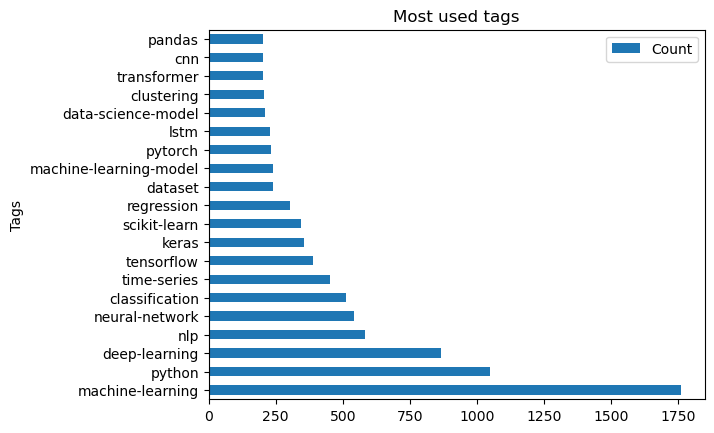

In [90]:
# Plotting the results
most_used.plot(x='Tags', kind='barh', title='Most used tags')

In [91]:
# Counting how many times each tag was viewed for top-20 tags
most_viewed = tags.groupby('Tags').sum().sort_values(by='ViewCount', ascending=False).head(20).reset_index()
most_viewed

,Tags,ViewCount
0,machine-learning,288905
1,python,240880
2,deep-learning,160820
3,nlp,107086
4,neural-network,92528
5,keras,78137
6,scikit-learn,77603
7,tensorflow,76019
8,classification,74449
9,pandas,70147


<AxesSubplot:title={'center':'Most viewed tags'}, ylabel='Tags'>

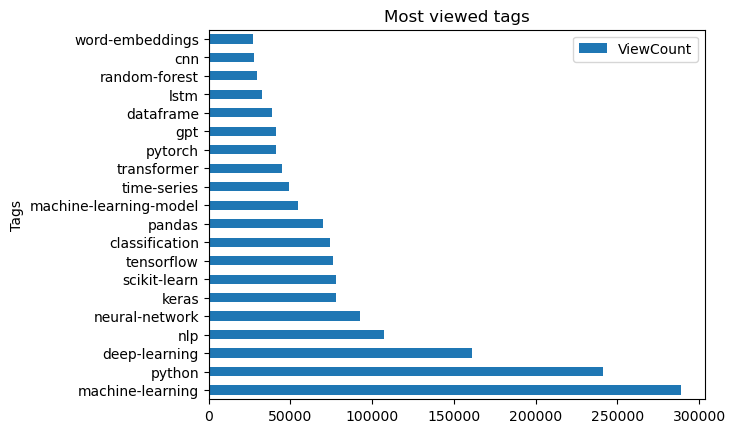

In [92]:
# Plotting the results
most_viewed.plot(x='Tags', kind='barh', title='Most viewed tags')

Looking at the results from the two dataframes, we see that most of the top tags are present in both, with Machine Learning being by far the most popular tag.

We will now explore the relationships between tags in two dataframes.

In [93]:
# Merging the dataframes based upon the most used tags
pd.merge(most_used, most_viewed, how="left", left_on='Tags', right_on='Tags')

,Tags,Count,ViewCount
0,machine-learning,1761,288905.0
1,python,1047,240880.0
2,deep-learning,867,160820.0
3,nlp,584,107086.0
4,neural-network,541,92528.0
5,classification,512,74449.0
6,time-series,452,49037.0
7,tensorflow,390,76019.0
8,keras,356,78137.0
9,scikit-learn,346,77603.0


The tags regression, dataset, data-science-model and clustering are frequently used, but do not appear in the top 20 most viewed tags.

In [94]:
# Merging the dataframes based upon the most viewed tags
pd.merge(most_used, most_viewed, how="right", left_on='Tags', right_on='Tags')

,Tags,Count,ViewCount
0,machine-learning,1761.0,288905
1,python,1047.0,240880
2,deep-learning,867.0,160820
3,nlp,584.0,107086
4,neural-network,541.0,92528
5,keras,356.0,78137
6,scikit-learn,346.0,77603
7,tensorflow,390.0,76019
8,classification,512.0,74449
9,pandas,202.0,70147


Tags such as gpt, dataframe, random-forest and word-embeddings are among the most viewed, but are not used very often.

In summary, the most popular tags (machine learning, deep learning, natural language processing (NLP), neural networks, etc.) are all related to the field of artificial intelligence (AI) and are often used together in different applications.
- Machine learning is a subset of AI that involves training algorithms to learn from data and make predictions or decisions without being explicitly programmed.
- Deep learning is a type of machine learning that uses multi-layer neural networks to learn complex representations of data.
- Neural networks are a type of algorithm inspired by the structure of the human brain that can learn from data and make predictions.
- NLP is a subfield of AI that focuses on the interaction between computers and human language. It involves the use of machine learning and deep learning techniques to analyze, understand, and generate human language.
- Python is a popular programming language for implementing machine learning, deep learning, and NLP techniques because of its ease of use and extensive libraries for data analysis and machine learning. Libraries such as TensorFlow, Keras, and PyTorch provide easy-to-use interfaces for building and training neural networks.

Next, we will track the dynamics of ML-related questions over time to support our findings.

We will query the DSSE database again, but this time for the entire available time period.

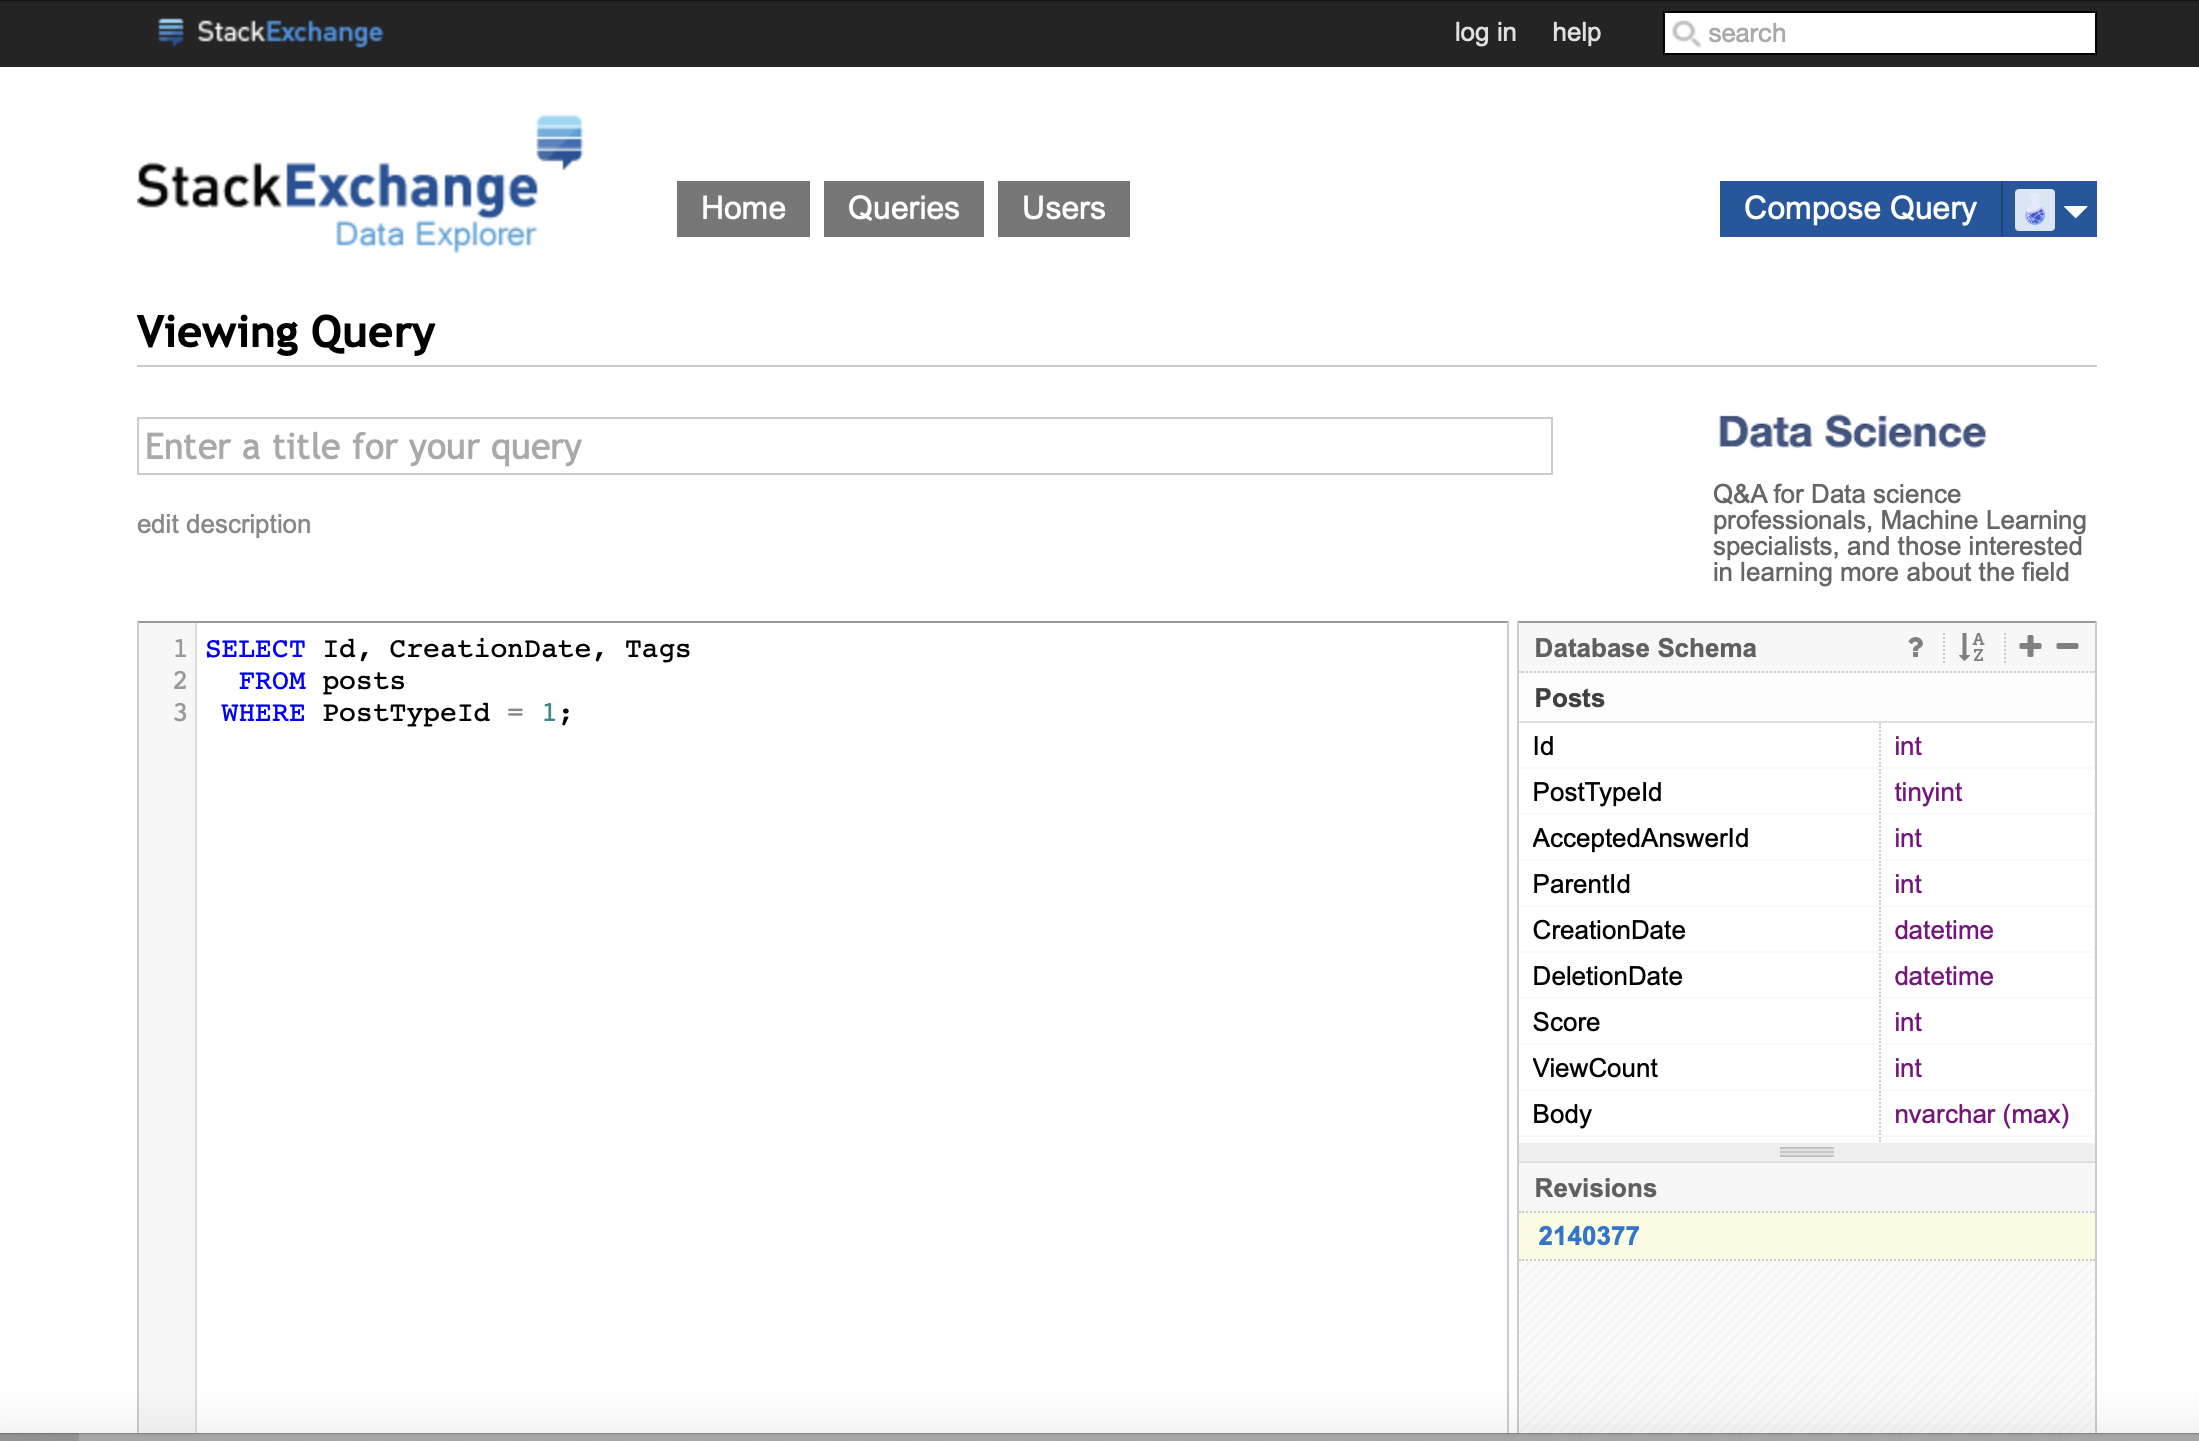

The result of the query is saved as all_questions.csv, which we will read into a dataframe and explore.

In [95]:
dsse_all = pd.read_csv('all_questions.csv')
dsse_all

,Id,CreationDate,Tags
0,91179,2021-03-26 10:05:38,<python><nlp><automatic-summarization>
1,91182,2021-03-26 10:34:44,<clustering><k-means><unsupervised-learning>
2,91185,2021-03-26 11:17:39,<machine-learning><deep-learning><neural-netwo...
3,91191,2021-03-26 13:15:30,<machine-learning><deep-learning><neural-netwo...
4,91192,2021-03-26 13:59:11,<linear-regression><bayesian><monte-carlo>
...,...,...,...
36142,62919,2019-11-09 13:45:48,<machine-learning>
36143,62922,2019-11-09 15:56:00,<neural-network><time-series><finance>
36144,62924,2019-11-09 17:00:44,<data-mining><text-mining><data-cleaning><prep...
36145,62926,2019-11-09 19:44:14,<pandas><dataframe>


In [96]:
# Transforming CreationDate to datetime
dsse_all['CreationDate'] = pd.to_datetime(dsse_all['CreationDate'])

# Splitting Tags into lists
dsse_all['Tags'] = dsse_all['Tags'].str.replace('><',',').str.replace('<','').str.replace('>','').str.split(',')

We will be tracking the popularity of ML-related tags over time. The following tags will be used as proxies for machine learning from our top 20 most viewed tags:
- machine-learning
- deep-learning
- nlp
- neural-network
- keras
- scikit-learn
- tensorflow
- Machine Learning Model
- transformer
- pytorch
- gpt
- lstm
- word embeddings

Other popular tags such as Python may or may not be associated with ML.

In [97]:
# Creating the list with all ML-related tags
ml_list = ['machine-learning', 'deep-learning', 'nlp', 'neural-network',
           'keras', 'scikit-learn', 'tensorflow', 'machine-learning-model',
           'transformer', 'pytorch', 'gpt', 'lstm', 'word-embeddings']

# Creating a mask to check whether at least one item from ml_list is contained among tags of each question
ml_mask = dsse_all['Tags'].apply(lambda x: any(item in x for item in ml_list))

In [98]:
# Applying the mask
dsse_all['ml'] = ml_mask.astype(int)
dsse_all

,Id,CreationDate,Tags,ml
0,91179,2021-03-26 10:05:38,"[python, nlp, automatic-summarization]",1
1,91182,2021-03-26 10:34:44,"[clustering, k-means, unsupervised-learning]",0
2,91185,2021-03-26 11:17:39,"[machine-learning, deep-learning, neural-netwo...",1
3,91191,2021-03-26 13:15:30,"[machine-learning, deep-learning, neural-netwo...",1
4,91192,2021-03-26 13:59:11,"[linear-regression, bayesian, monte-carlo]",0
...,...,...,...,...
36142,62919,2019-11-09 13:45:48,[machine-learning],1
36143,62922,2019-11-09 15:56:00,"[neural-network, time-series, finance]",1
36144,62924,2019-11-09 17:00:44,"[data-mining, text-mining, data-cleaning, prep...",0
36145,62926,2019-11-09 19:44:14,"[pandas, dataframe]",0


Next, we look at how many ML-related questions are asked each year.

In [99]:
# Extracting year of each question asked
dsse_all['date'] = dsse_all['CreationDate'].dt.strftime('%Y')

# Creating total column to keep track of total amount of questions asked
dsse_all['total'] = 1

# Exctacting the columns we will need for further analysis
dsse_ml = dsse_all[['date', 'total', 'ml']]
dsse_ml

,date,total,ml
0,2021,1,1
1,2021,1,0
2,2021,1,1
3,2021,1,1
4,2021,1,0
...,...,...,...
36142,2019,1,1
36143,2019,1,1
36144,2019,1,0
36145,2019,1,0


In [100]:
# Grouping by year
dsse_ml_2 = dsse_ml.groupby('date').sum()
dsse_ml_2

,total,ml
date,,
2014,559,221
2015,1161,513
2016,2112,1097
2017,2916,1749
2018,5326,3457
2019,6749,4231
2020,6132,3798
2021,4716,2839
2022,4561,2624


In [101]:
# Calculating how many ML-questions there are relative to the total amount of questions per year
dsse_ml_2['ml_pct'] = round(dsse_ml_2['ml'] / dsse_ml_2['total'] * 100, 1)
dsse_ml_2

,total,ml,ml_pct
date,,,
2014,559,221,39.5
2015,1161,513,44.2
2016,2112,1097,51.9
2017,2916,1749,60.0
2018,5326,3457,64.9
2019,6749,4231,62.7
2020,6132,3798,61.9
2021,4716,2839,60.2
2022,4561,2624,57.5


<AxesSubplot:title={'center':'Popularity of ML-related questions'}, xlabel='date'>

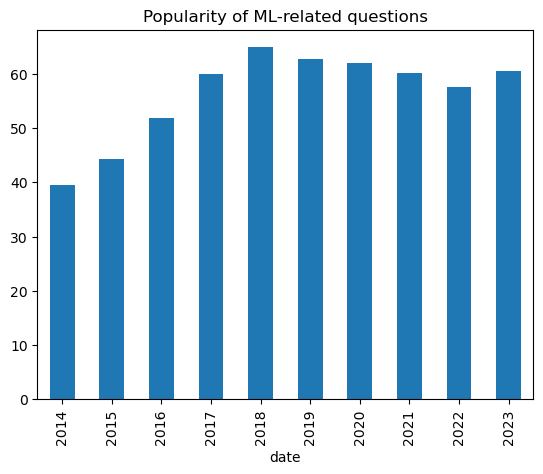

In [102]:
# Plotting the results
dsse_ml_2['ml_pct'].plot(kind='bar', title='Popularity of ML-related questions')

In summary, Machine Learning questions have dramatically increased in popularity in recent years, accounting for more than half of all questions asked on DSSE, and are currently the hottest topic in data science.

# Conclusion

Our project aimed to determine the best content to write about in data science by analyzing the Data Science Stack Exchange (DSSE) website. Our approach involved examining the popularity of different tags and uncovering the significant trends in the data science field.

Through our analysis, we found that the most popular tags on DSSE, such as machine learning, deep learning, NLP, and neural networks, are all closely intertwined with the field of artificial intelligence (AI). Machine learning emerged as the dominant topic, showcasing its prominence and relevance in the data science community. Additionally, our research revealed the prevalence of Python as the preferred programming language for implementing machine learning, deep learning, and NLP techniques due to its user-friendly nature and extensive libraries.

Our findings emphasize the increasing interest in machine learning and the role of AI in the data science landscape. This information provides valuable insights for content creators and aspiring data scientists, guiding them towards relevant and in-demand topics. By focusing on the evolving field of AI and harnessing the power of Python, individuals can effectively contribute to the data science community.

In summary, our project sheds light on the key trends and topics in data science based on our analysis of DSSE. The dominance of machine learning, coupled with the widespread adoption of Python, highlights the significance of AI in shaping the future of the field. These findings serve as a foundation for individuals seeking to navigate the data science landscape and engage in meaningful discussions within the community.